In [1]:
import os
import glob
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import shutil

In [2]:
raw_data_path = '/tmp/text_renderer/output/randomize_vehicle_plate_150k/'

In [3]:
annotation = open(os.path.join(raw_data_path, 'tmp_labels.txt'), 'r').read().split('\n')

In [4]:
annotation[-1]

''

In [5]:
raw_tgt = []
raw_src = []
for anno in annotation[:-1]:
    id, text = anno[:8], anno[9:]
    raw_src.append('{}.png'.format(id))
    raw_tgt.append(text)

In [6]:
len(annotation[:-1])

150000

In [7]:
raw_src[:10]

['00009376.png',
 '00004688.png',
 '00023440.png',
 '00028128.png',
 '00000000.png',
 '00014064.png',
 '00018752.png',
 '00009377.png',
 '00004689.png',
 '00014065.png']

In [8]:
raw_tgt[:10]

['HQ 52-27',
 '65UD 159.29',
 '82DA 921.53',
 '85-T 066.78',
 '76NN 771.53',
 '26BK 626.02',
 '28II 012.79',
 '96QT 437.06',
 'PM 77-63',
 'AN 25-52']

In [9]:
new_dataset_path = '/tmp/final_randomize_vehicle_plate_150k/'
os.makedirs(new_dataset_path, exist_ok=True)
new_image_path = os.path.join(new_dataset_path, 'images')
os.makedirs(new_image_path, exist_ok=True)

In [10]:
raw_data_path = '/tmp/text_renderer/output/'
count = 0
for file_name in tqdm(raw_src):
    sample_path = os.path.join(raw_data_path, 'randomize_vehicle_plate_150k_augmented', file_name)
    new_path = os.path.join(new_image_path, file_name)
    if not os.path.exists(sample_path):
        sample_path = os.path.join(raw_data_path, 'randomize_vehicle_plate_150k', file_name)
        count += 1
    try:
        shutil.copyfile(sample_path, new_path)
    except IsADirectoryError:
        pass
print(count)

100%|██████████| 150000/150000 [02:44<00:00, 913.98it/s] 

0


In [11]:
new_src = []
new_tgt = []
for file_name, text in tqdm(zip(raw_src, raw_tgt)):
    new_src.append(file_name)
    word = [' '.join(list(word)) for word in text.split()]
    text = ' \; '.join(word)
    new_tgt.append(text)

150000it [00:00, 542793.64it/s]


In [12]:
print(new_tgt[10])

4 0 C V \; 4 5 2 . 1 5


In [13]:
for src in new_src:
    image_path = os.path.join(new_image_path, src)
    if not os.path.exists(image_path):
        print(src)

In [14]:
with open(os.path.join(new_dataset_path,'src.txt'), 'w') as f:
    for each in new_src:
        f.write('{}\n'.format(each))
with open(os.path.join(new_dataset_path,'tgt.txt'), 'w') as f:
    for each in new_tgt:
        f.write('{}\n'.format(each))

In [15]:
def show_sample(img_path):
    img = cv2.imread(img_path)
    print(img.shape)
    plt.imshow(img)

7 4 V W \; 4 5 8 . 0 2
(31, 159, 3)


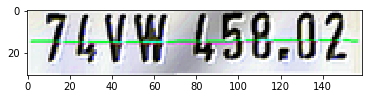

In [25]:
import random
index = random.randint(1, 10000)
img_path = os.path.join(new_image_path, new_src[index])
print(new_tgt[index])
show_sample(img_path)